# Code Example from Lecture 9

The following notebook contains examples of code for solving regression problems.

## Data Generation

Generate a 1-dimensional data: y = -3x + 1 + epsilon, where epsilon is a random noise generated from a Gaussian distribution with mean 0 and standard deviation 0.2. 

Text(0, 0.5, 'y')

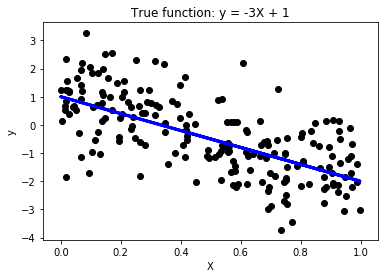

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

seed = 1            # seed for random number generation 
numInstances = 200  # number of data instances
np.random.seed(seed)
X = np.random.rand(numInstances,1).reshape(-1,1)
y_true = -3*X + 1 
y = y_true + np.random.normal(size=(numInstances,1))

plt.scatter(X, y,  color='black')
plt.plot(X, y_true, color='blue', linewidth=3)
plt.title('True function: y = -3X + 1')
plt.xlabel('X')
plt.ylabel('y')

## Regression Example

The following example illustrates how to use Python scikit-learn package to fit linear regression problems.

### Step 1: Split Input Data into Training and Test Sets

In [2]:
numTrain = 20   # number of training instances
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

### Step 2: Fit Regression Model to Training Set

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Step 3: Apply Model to the Test Set 

Text(0, 0.5, 'Predicted values for y')

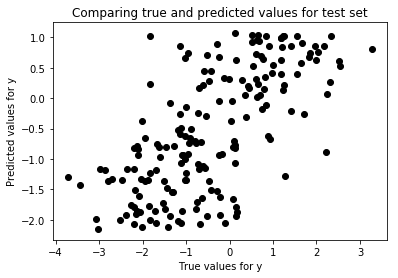

In [4]:
# Apply model to the test set
y_pred_test = regr.predict(X_test)

# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

### Step 4: Evaluate Model Performance on Test Set

In [5]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Root mean squared error = 1.0476
R-squared = 0.4443


### Step 5: Postprocessing

Slope =  -3.2423545446565014
Intercept =  1.0805993038584836


Text(0, 0.5, 'y')

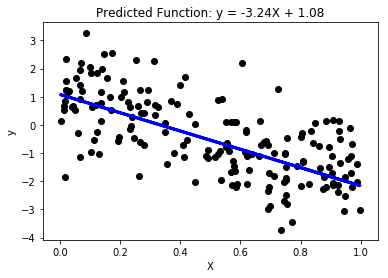

In [6]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

## Effect of Correlated Attributes

The following example illustrates how the presence of correlated attributes affect regression results. 

Correlation between X and X2 = 0.9321369405348069
Correlation between X2 and X3 = 0.9826615443221465
Correlation between X3 and X4 = 0.928722762458866
Correlation between X4 and X5 = 0.9190449272547068


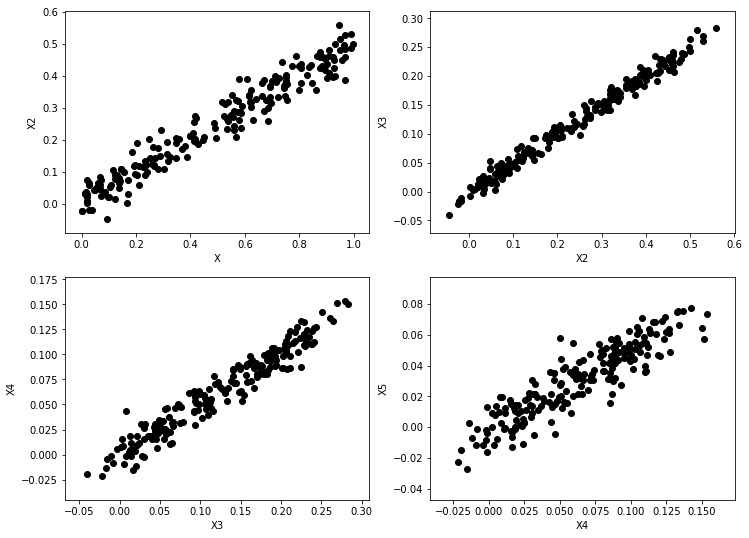

In [7]:
seed = 1
np.random.seed(seed)
X2 = 0.5*X + np.random.normal(0, 0.04, size=numInstances).reshape(-1,1)
X3 = 0.5*X2 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X4 = 0.5*X3 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)
X5 = 0.5*X4 + np.random.normal(0, 0.01, size=numInstances).reshape(-1,1)

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,9))
ax1.scatter(X, X2, color='black')
ax1.set_xlabel('X')
ax1.set_ylabel('X2')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
print('Correlation between X and X2 =', c[0,1])

ax2.scatter(X2, X3, color='black')
ax2.set_xlabel('X2')
ax2.set_ylabel('X3')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
print('Correlation between X2 and X3 =', c[0,1])

ax3.scatter(X3, X4, color='black')
ax3.set_xlabel('X3')
ax3.set_ylabel('X4')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
print('Correlation between X3 and X4 =', c[0,1])

ax4.scatter(X4, X5, color='black')
ax4.set_xlabel('X4')
ax4.set_ylabel('X5')
c = np.corrcoef(np.column_stack((X4[:-numTest],X5[:-numTest])).T)
print('Correlation between X4 and X5 =', c[0,1])

Create training and test data

In [8]:
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))
X_train5 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest],X5[:-numTest]))
X_test5 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:],X5[-numTest:]))

Train regression models

In [9]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

regr5 = linear_model.LinearRegression()
regr5.fit(X_train5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Apply regression models to training and test sets

In [10]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)
y_pred_train5 = regr5.predict(X_train5)
y_pred_test5 = regr5.predict(X_test5)

In [11]:
import pandas as pd

columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0][0], regr.intercept_[0])
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_[0][0]).sum() + np.absolute(regr.intercept_[0])]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0][0], regr2.coef_[0][1], regr2.intercept_[0])
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_[0])]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0][0], regr3.coef_[0][1], 
                                                regr3.coef_[0][2], regr3.intercept_[0])
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_[0])]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0][0], regr4.coef_[0][1], 
                                        regr4.coef_[0][2], regr4.coef_[0][3], regr4.intercept_[0])
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_[0])]

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (regr5.coef_[0][0], 
                                        regr5.coef_[0][1], regr5.coef_[0][2], 
                                        regr5.coef_[0][3], regr5.coef_[0][4], regr5.intercept_[0])
values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train5)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test5)),
           np.absolute(regr5.coef_[0]).sum() + np.absolute(regr5.intercept_[0])]

results = pd.DataFrame([values1, values2, values3, values4, values5], columns=columns)
results

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927


## Ridge Regression

In [12]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.4)
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0], 
                                        ridge.coef_[0][1], ridge.coef_[0][2], 
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]

ridge_results = pd.DataFrame([values6], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
Ridge,-2.24 X + -0.43 X2 + -0.14 X3 + -0.10 X4 + 0.0...,0.917456,1.052388,3.765759


## Lasso Regression

In [13]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(X_train5, y_train)
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_[0])
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_[0])]

lasso_results = pd.DataFrame([values7], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
Ridge,-2.24 X + -0.43 X2 + -0.14 X3 + -0.10 X4 + 0.0...,0.917456,1.052388,3.765759
Lasso,-2.90 X + 0.00 X2 + 0.00 X3 + 0.00 X4 + 0.00 X...,0.895692,1.043334,3.856242


## Cross-Validation

In [14]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[0.2, 0.4, 0.6, 0.8, 1.0])
ridge.fit(X_train5, y_train)
y_pred_train_ridge = ridge.predict(X_train5)
y_pred_test_ridge = ridge.predict(X_test5)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (ridge.coef_[0][0], 
                                        ridge.coef_[0][1], ridge.coef_[0][2], 
                                        ridge.coef_[0][3], ridge.coef_[0][4], ridge.intercept_[0])
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_[0])]
print("Selected alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 0.20


,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
RidgeCV,-2.74 X + -0.16 X2 + 0.09 X3 + 0.01 X4 + 0.21 ...,0.899190,1.044401,4.112120


In [15]:
from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0])
lasso.fit(X_train5, y_train.ravel())
y_pred_train_lasso = lasso.predict(X_train5)
y_pred_test_lasso = lasso.predict(X_test5)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f X5 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.coef_[4], lasso.intercept_)
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values7], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results, lasso_results])

Selected alpha = 0.01


,Model,Train error,Test error,Sum of Absolute Weights
0,-3.24 X + 1.08,0.891873,1.047626,4.322954
1,-5.90 X + 5.92 X2 + 1.00,0.856157,1.087601,12.817040
2,-6.22 X + -2.30 X2 + 17.14 X3 + 1.08,0.834238,1.094661,26.744867
3,-7.16 X + 0.93 X2 + 8.39 X3 + 11.85 X4 + 1.12,0.825722,1.128861,29.453660
4,-7.16 X + 4.50 X2 + 3.52 X3 + -6.55 X4 + 25.68...,0.799399,1.146546,48.614927
RidgeCV,-2.74 X + -0.16 X2 + 0.09 X3 + 0.01 X4 + 0.21 ...,0.899190,1.044401,4.112120
LassoCV,-3.07 X + 0.00 X2 + 0.00 X3 + 0.00 X4 + 0.00 X...,0.892829,1.043911,4.089598


## Using Other Modeling Techniques

In [16]:
from sklearn import neural_network

mlp = neural_network.MLPRegressor(hidden_layer_sizes=(3,), activation='logistic', 
                                  max_iter=2000, random_state=1)
mlp = mlp.fit(X_train5, y_train.ravel())

y_pred_train_mlp = mlp.predict(X_train5)
y_pred_test_mlp = mlp.predict(X_test5)

print("Results for neural networks:")
print("\t Training error = %.4f" % (np.sqrt(mean_squared_error(y_train, y_pred_train_mlp))))
print("\t Test error = %.4f" % (np.sqrt(mean_squared_error(y_test, y_pred_test_mlp))))

Results for neural networks:
	 Training error = 0.9506
	 Test error = 1.0608


In [17]:
from sklearn import svm

sv = svm.SVR(gamma='scale', C=1.0, epsilon=0.2)
sv = sv.fit(X_train5, y_train.ravel())

y_pred_train_svr = sv.predict(X_train5)
y_pred_test_svr = sv.predict(X_test5)

print("Results for neural networks:")
print("\t Training error = %.4f" % (np.sqrt(mean_squared_error(y_train, y_pred_train_svr))))
print("\t Test error = %.4f" % (np.sqrt(mean_squared_error(y_test, y_pred_test_svr))))

Results for neural networks:
	 Training error = 0.8934
	 Test error = 1.0491
